In [3]:
import pandas as pd
import numpy as np
import os
from utils import convert_to_24_hour_format, separate_in_two_columns, categorize_checkin_time, categorize_checkout_time, process_policy, find_date_pattern, preprocessing_homeaway_location_type
from sklearn.ensemble import RandomForestClassifier
os.chdir('C:\\Users\\Pedro\\Desktop\\CDT')

properties = pd.read_csv("merged.csv", engine='python', encoding='utf-8')


columns_to_drop = [

    # Identificadores
    'Property ID',
    'Airbnb Host ID',
    'Airbnb Property ID',
    'HomeAway Property Manager ID',
    'HomeAway Property ID',
    'HomeAway Location Type',
    'Integrated Property Manager',
    'Airbnb Communication Rating',
    'Airbnb Accuracy Rating',
    'Airbnb Cleanliness Rating',
    'Airbnb Checkin Rating',
    'Airbnb Location Rating',
    'Airbnb Value Rating',
    'Published Monthly Rate (USD)',
    'Published Weekly Rate (USD)',
    'Multiple Properties',

    'Listing Title',
    'Listing Type',
    'License',
    'Listing Images',
    'Listing Main Image URL',
    'Listing URL',

    # Innecesario ???
    'Last Scraped Date',

    # Información repetida (ya tenemos zona)
    'Neighborhood',
    'Exact Location',
    'Latitude',
    'Longitude',
    'HomeAway Premier Partner',

    # Nos quedamos con USD
    'Average Daily Rate (Native)',
    'Average Daily Rate (USD)',
    'Annual Revenue LTM (Native)',
    'Annual Revenue LTM (USD)',
    'Security Deposit (Native)',
    'Security Deposit (USD)',
    'Cleaning Fee (Native)',
    'Extra People Fee (Native)',
    'Extra People Fee (USD)'
    ]

properties = properties.drop(columns=columns_to_drop)

In [4]:
## MODIFICAR CHECK-IN TIME
properties['Check-in Time'] = properties['Check-in Time'].apply(separate_in_two_columns)
properties['Check-in Time'] = properties['Check-in Time'].apply(categorize_checkin_time)

## MODIFICAR CHECKOUT TIME
properties['Checkout Time'] = properties['Checkout Time'].apply(convert_to_24_hour_format)
properties['Checkout Time'] = properties['Checkout Time'].apply(categorize_checkout_time)

## MODIFICAR CANCELATION POLICY
properties['Cancellation Policy'] = properties['Cancellation Policy'].apply(process_policy)
properties['Cancellation Policy'] = properties['Cancellation Policy'].apply(lambda x: 'Strict' if (x == 'Better_strict' or x == 'Firm') else x)



In [5]:
mask = ~properties['Created Date'].isna()

properties.loc[mask, 'Created Date'] = properties.loc[mask, 'Created Date'].astype(str).str[:4]

mask = ~properties['Calendar Last Updated'].isna()

properties.loc[mask, 'Calendar Last Updated'] = properties.loc[mask, 'Calendar Last Updated'].astype(str).str[:4]


In [6]:
def categorize_max_guests(value):
    if value <= 3:
        return 'Small'
    elif value <= 5:
        return 'Medium'
    else:
        return 'Big'

properties['Property Size'] = properties['Max Guests'].apply(categorize_max_guests)

columns_to_drop = [

    # Identificadores
    'Max Guests',
    'Bedrooms',
    'Bathrooms',
]



properties = properties.drop(columns=columns_to_drop)

pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')

In [7]:
columnas_categoricas = ['amenities', 'Airbnb Property Plus',
                        'Pets Allowed', 'Instantbook Enabled', 'Checkout Time',
                        'Check-in Time', 'Cancellation Policy', 'Airbnb Superhost',
                        'Airbnb Response Time (Text)', 'Calendar Last Updated',
                        'Currency Native', 'State', 'Created Date', 'Property Type','Property Size']

df = properties.drop(columnas_categoricas, axis=1).drop(['Professionality'],axis=1)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


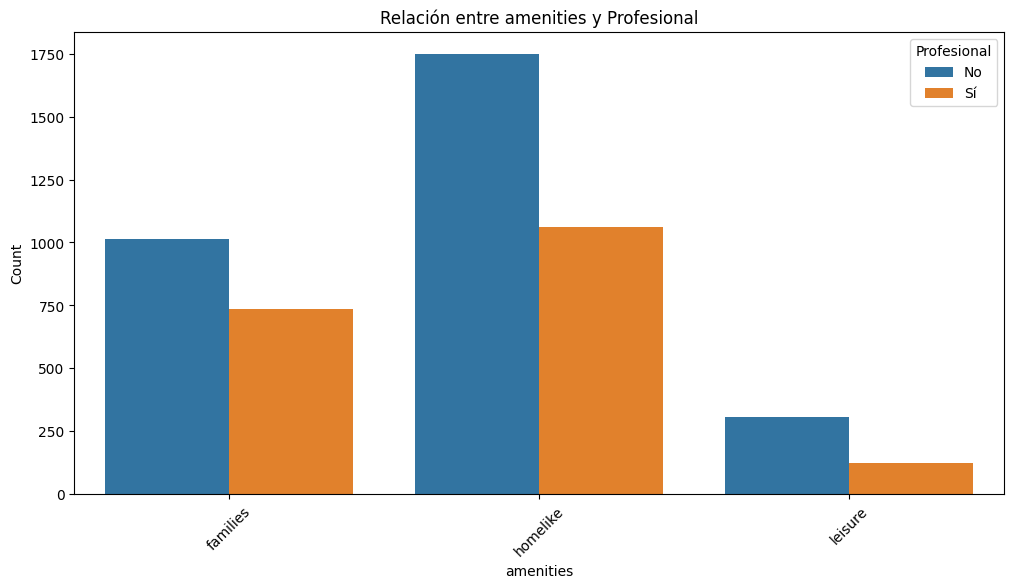

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


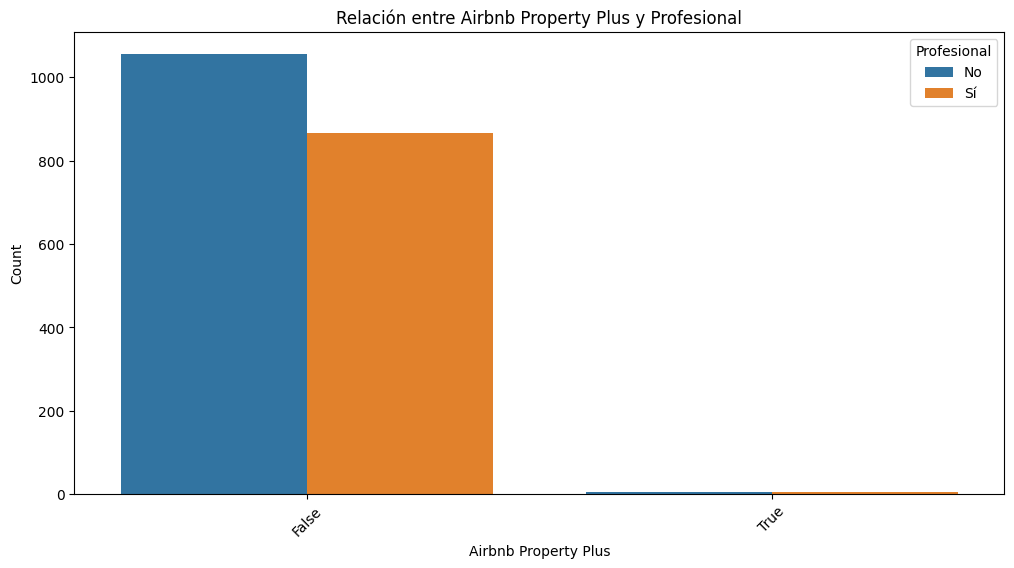

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


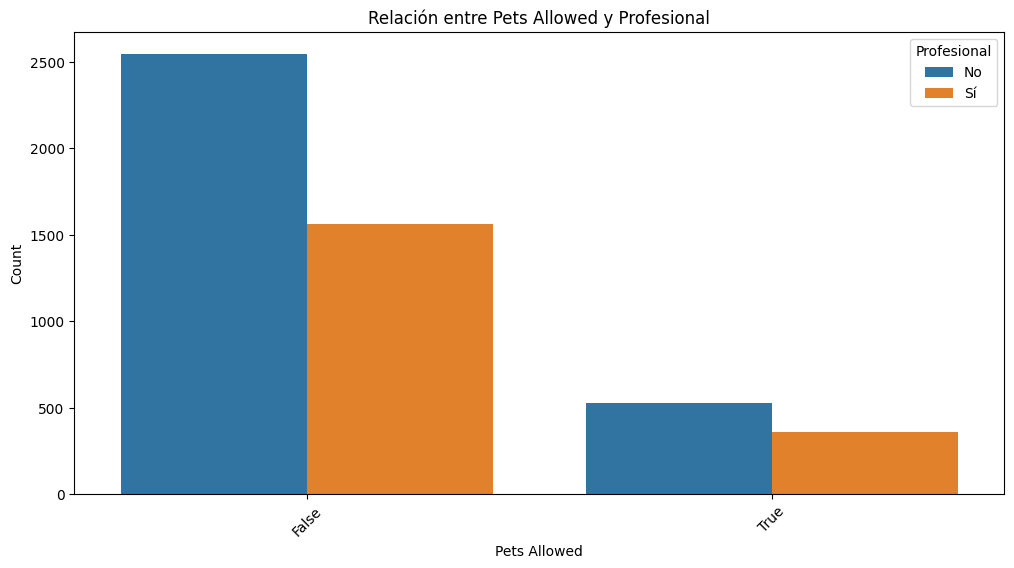

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


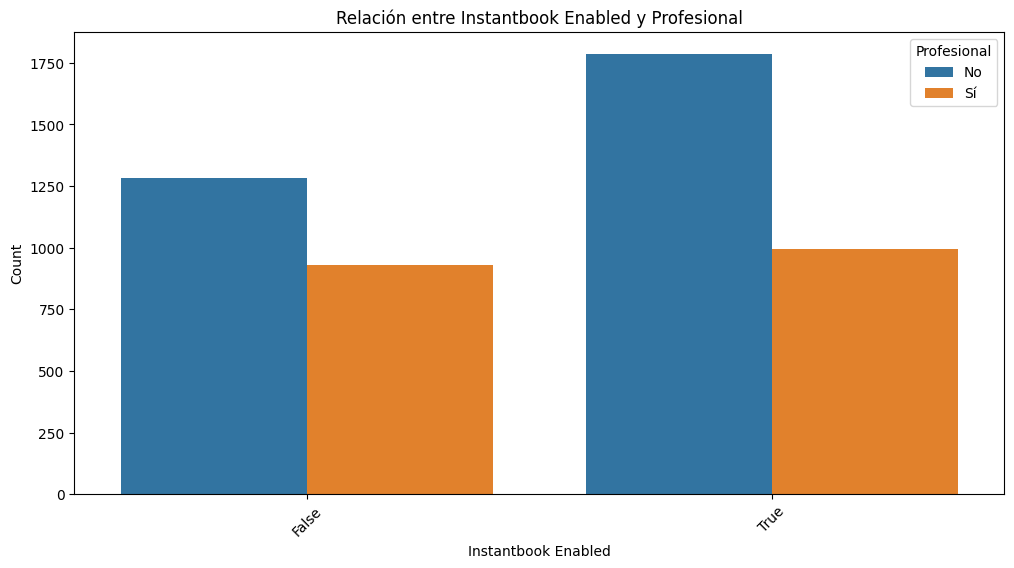

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


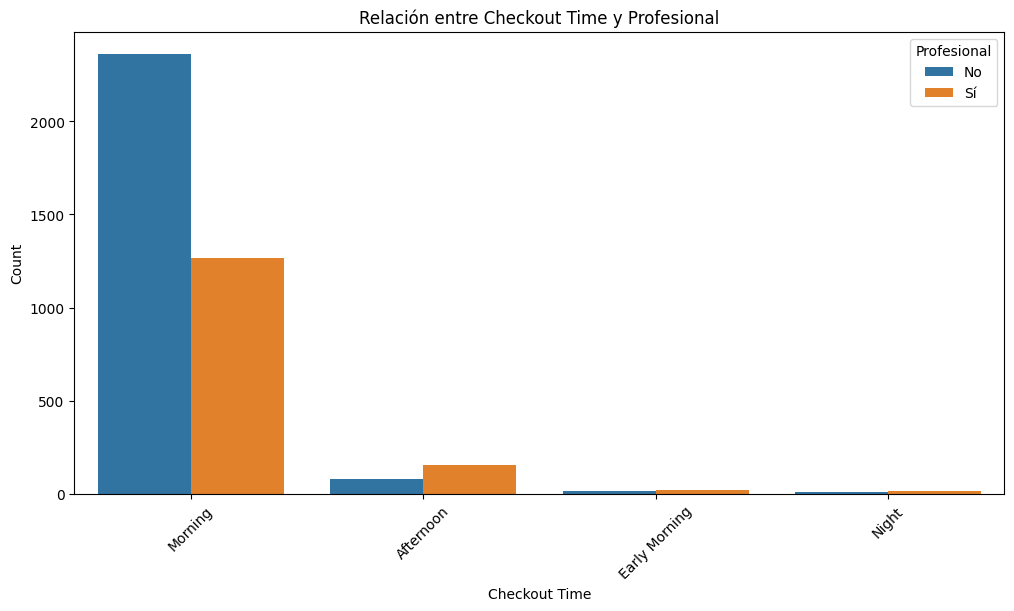

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


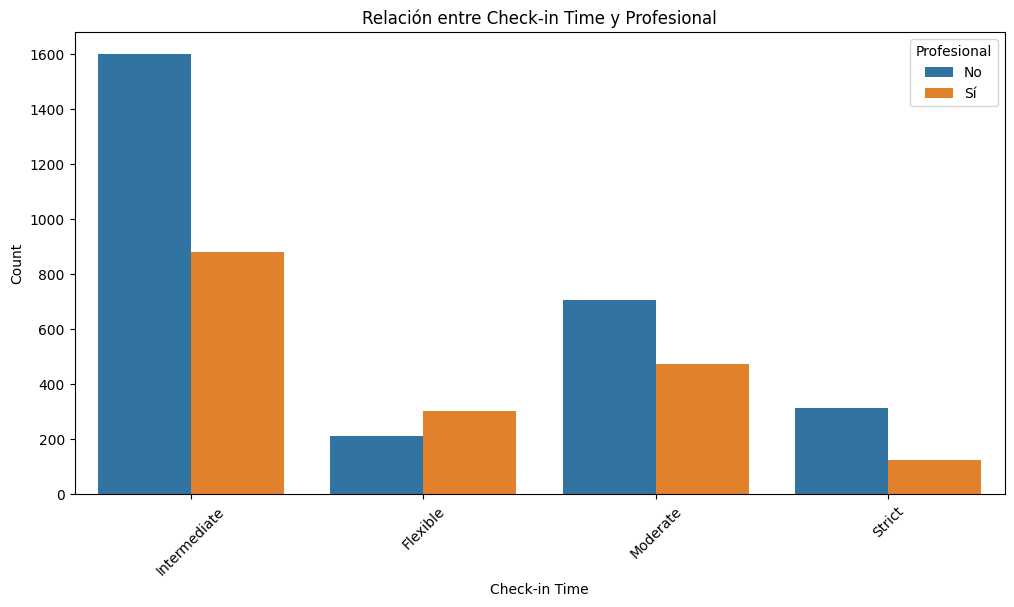

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


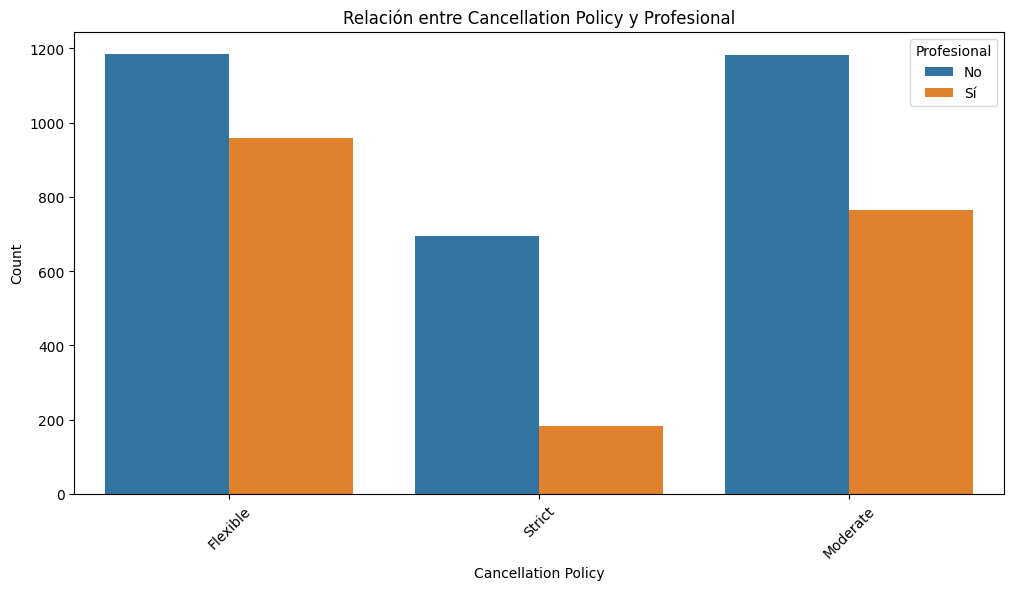

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


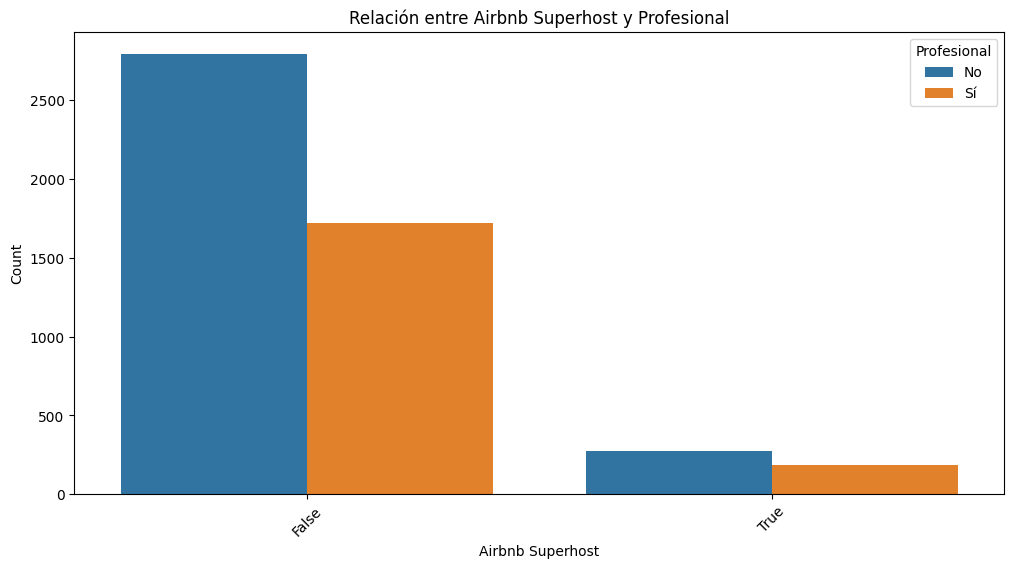

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


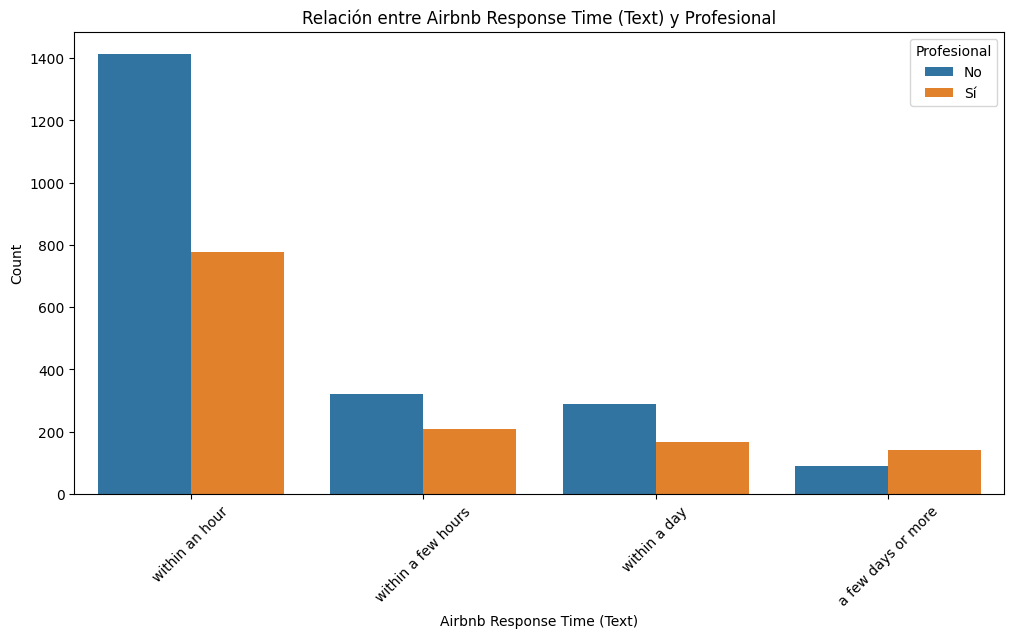

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


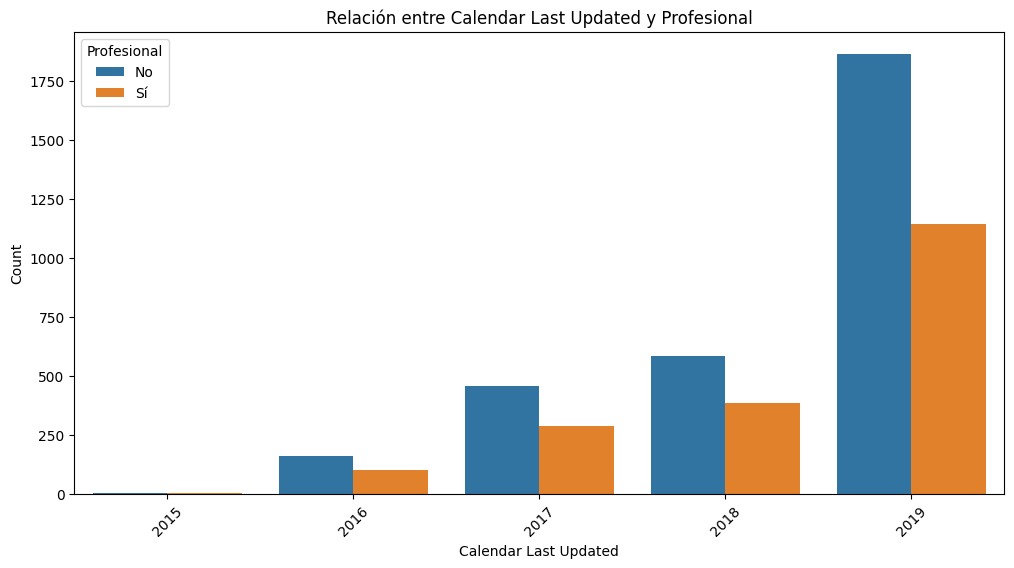

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


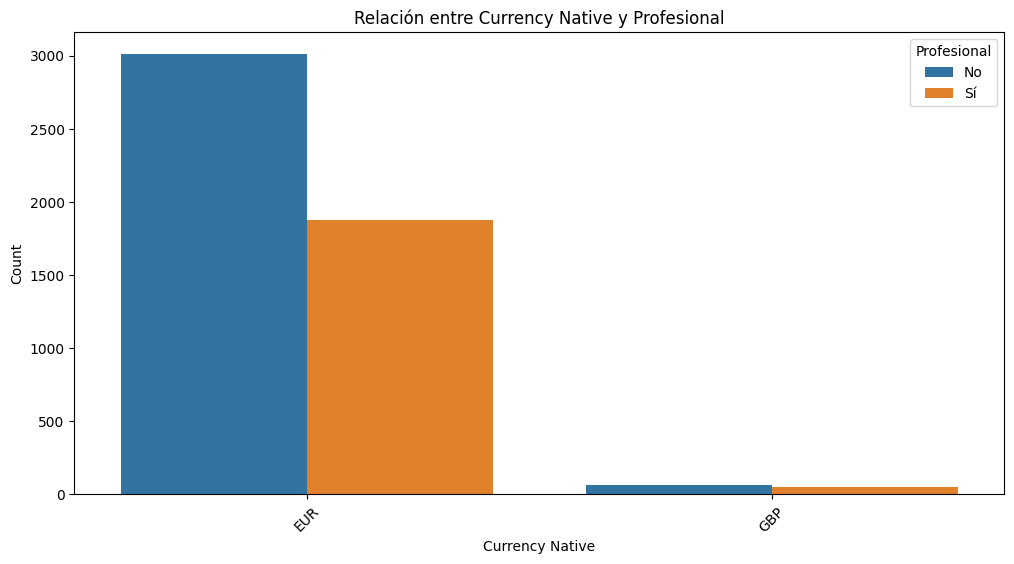

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


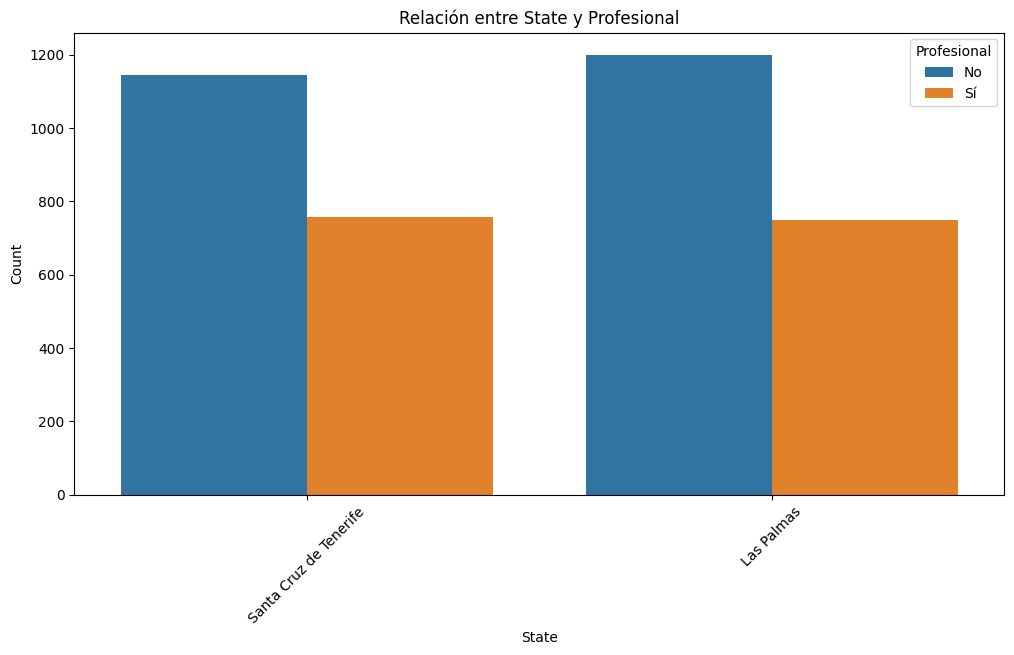

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


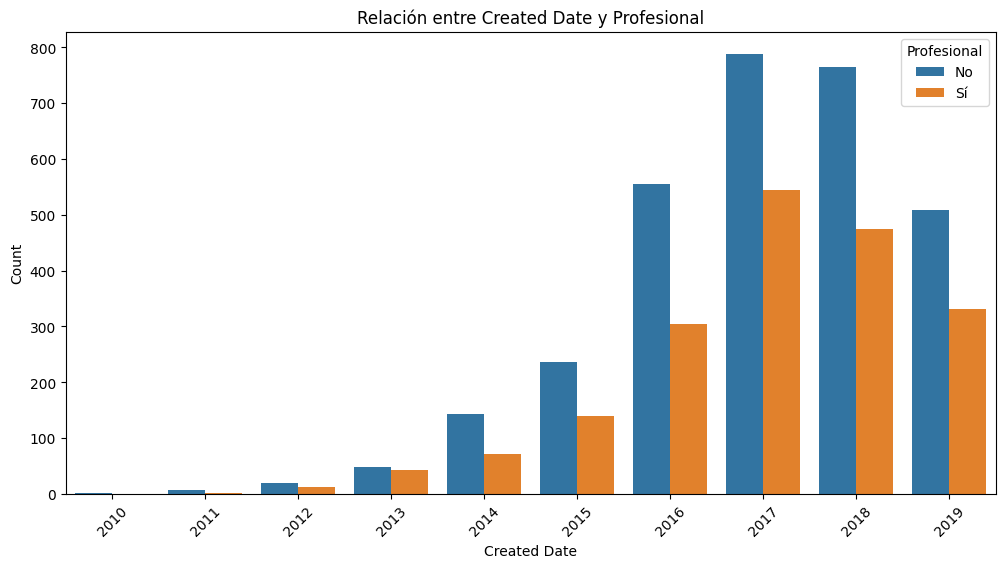

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


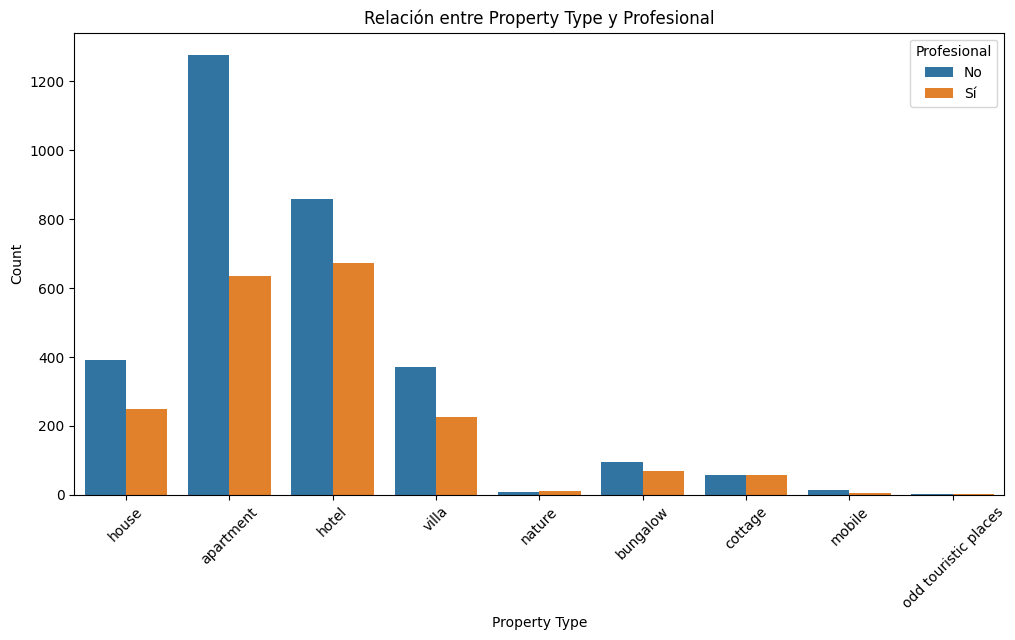

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


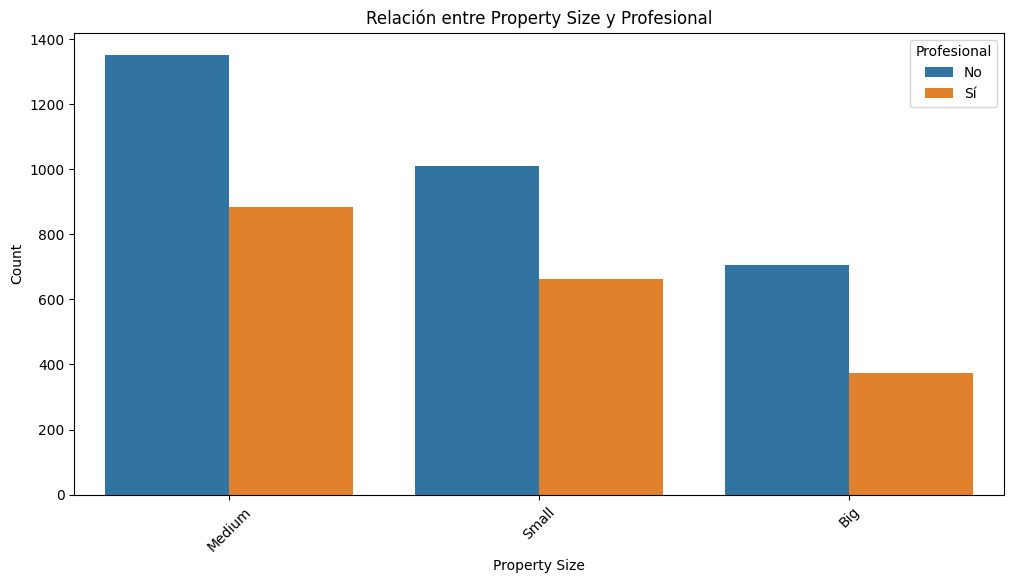

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

properties['profesional'] = properties['profesional'].astype(str)

# Filtrar el DataFrame para incluir solo las filas con 'EUR' y 'GBP' en la columna 'Currency Native'
filtered_properties = properties[properties['Currency Native'].isin(['EUR', 'GBP'])]

# Filtrar NaN en las columnas 'Calendar Last Updated' y 'Created Date'
filtered_properties = filtered_properties.dropna(subset=['Calendar Last Updated', 'Created Date'])

# Convertir 'Calendar Last Updated' y 'Created Date' al tipo de datos de fecha si aún no lo están
filtered_properties['Calendar Last Updated'] = pd.to_datetime(filtered_properties['Calendar Last Updated'])
filtered_properties['Created Date'] = pd.to_datetime(filtered_properties['Created Date'])

# Extraer el año de las fechas
filtered_properties['Calendar Last Updated Year'] = filtered_properties['Calendar Last Updated'].dt.year
filtered_properties['Created Date Year'] = filtered_properties['Created Date'].dt.year

# Ordenar las categorías por año
order_calendar_last_updated = filtered_properties['Calendar Last Updated Year'].sort_values().unique()
order_created_date = filtered_properties['Created Date Year'].sort_values().unique()

# Loop para generar gráficos de barras para las variables categóricas
for columna in columnas_categoricas:
    plt.figure(figsize=(12, 6))
    if columna == 'Calendar Last Updated':
        sns.countplot(x='Calendar Last Updated Year', hue='profesional', data=filtered_properties, order=order_calendar_last_updated)
    elif columna == 'Created Date':
        sns.countplot(x='Created Date Year', hue='profesional', data=filtered_properties, order=order_created_date)
    else:
        sns.countplot(x=columna, hue='profesional', data=filtered_properties)
    plt.title(f'Relación entre {columna} y Profesional')
    plt.xlabel(columna)
    plt.ylabel('Count')
    plt.legend(title='Profesional', labels=['No', 'Sí'])
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
    plt.show()


C:\Users\Pedro\AppData\Local\Temp\ipykernel_20452\379247367.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df_count = df.groupby(['rating_interval', 'profesional']).size().unstack().fillna(0)


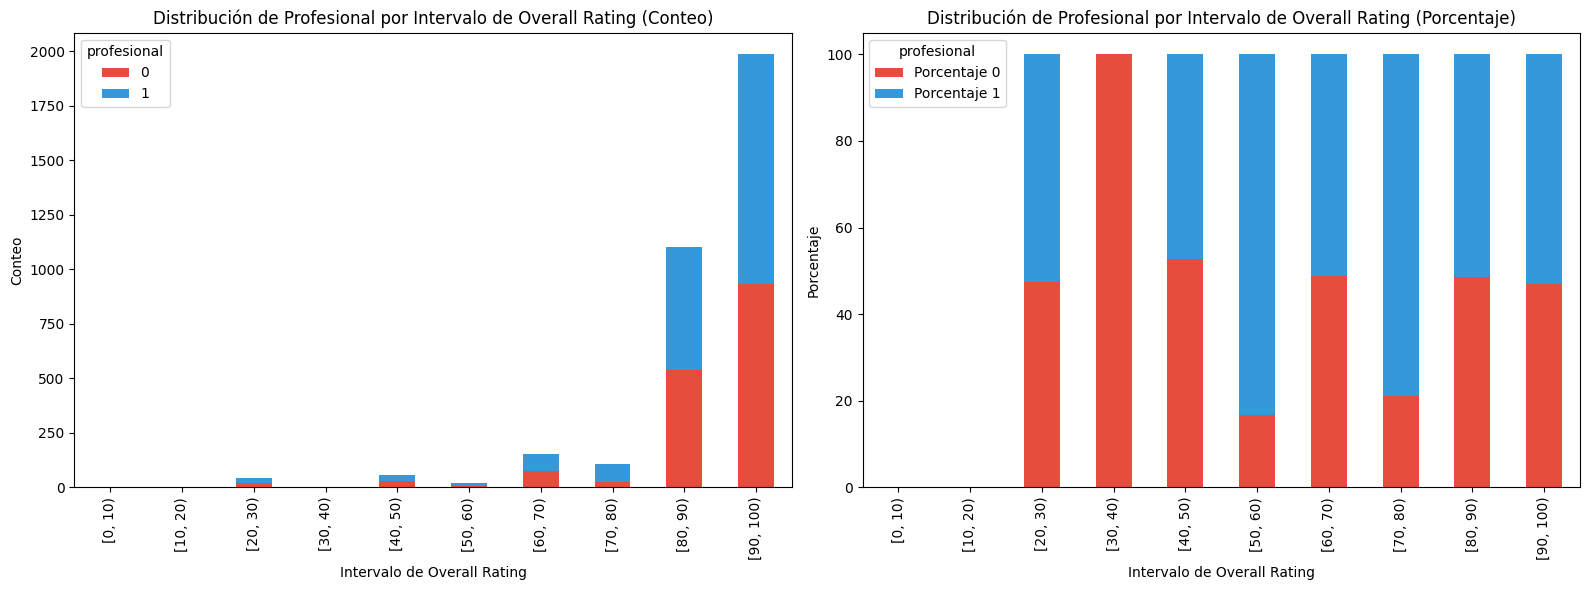

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df con las columnas 'Overall Rating' y 'profesional'

# Crear intervalos de 10 en 10 para 'Overall Rating'
df['rating_interval'] = pd.cut(df['Overall Rating'], bins=range(0, 101, 10), right=False)

# Configura el tamaño de la figura y crea un grid de subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Panel 1: Gráfico de barras apiladas para el conteo de observaciones
agg_df_count = df.groupby(['rating_interval', 'profesional']).size().unstack().fillna(0)
agg_df_count.plot(kind='bar', stacked=True, color=["#E74C3C", "#3498DB"], ax=axes[0])
axes[0].set_xlabel('Intervalo de Overall Rating')
axes[0].set_ylabel('Conteo')
axes[0].set_title('Distribución de Profesional por Intervalo de Overall Rating (Conteo)')

# Panel 2: Gráfico de barras apiladas para los porcentajes
agg_df_percentage = agg_df_count.copy()
agg_df_percentage['Porcentaje 0'] = (agg_df_percentage[0] / (agg_df_percentage[0] + agg_df_percentage[1])) * 100
agg_df_percentage['Porcentaje 1'] = (agg_df_percentage[1] / (agg_df_percentage[0] + agg_df_percentage[1])) * 100
agg_df_percentage[['Porcentaje 0', 'Porcentaje 1']].plot(kind='bar', stacked=True, color=["#E74C3C", "#3498DB"], ax=axes[1])
axes[1].set_xlabel('Intervalo de Overall Rating')
axes[1].set_ylabel('Porcentaje')
axes[1].set_title('Distribución de Profesional por Intervalo de Overall Rating (Porcentaje)')

# Muestra el gráfico completo para "Overall Rating"
plt.tight_layout()
plt.show()


C:\Users\Pedro\AppData\Local\Temp\ipykernel_20452\5097118.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df_count = df.groupby(['occupancy_interval', 'profesional']).size().unstack().fillna(0)


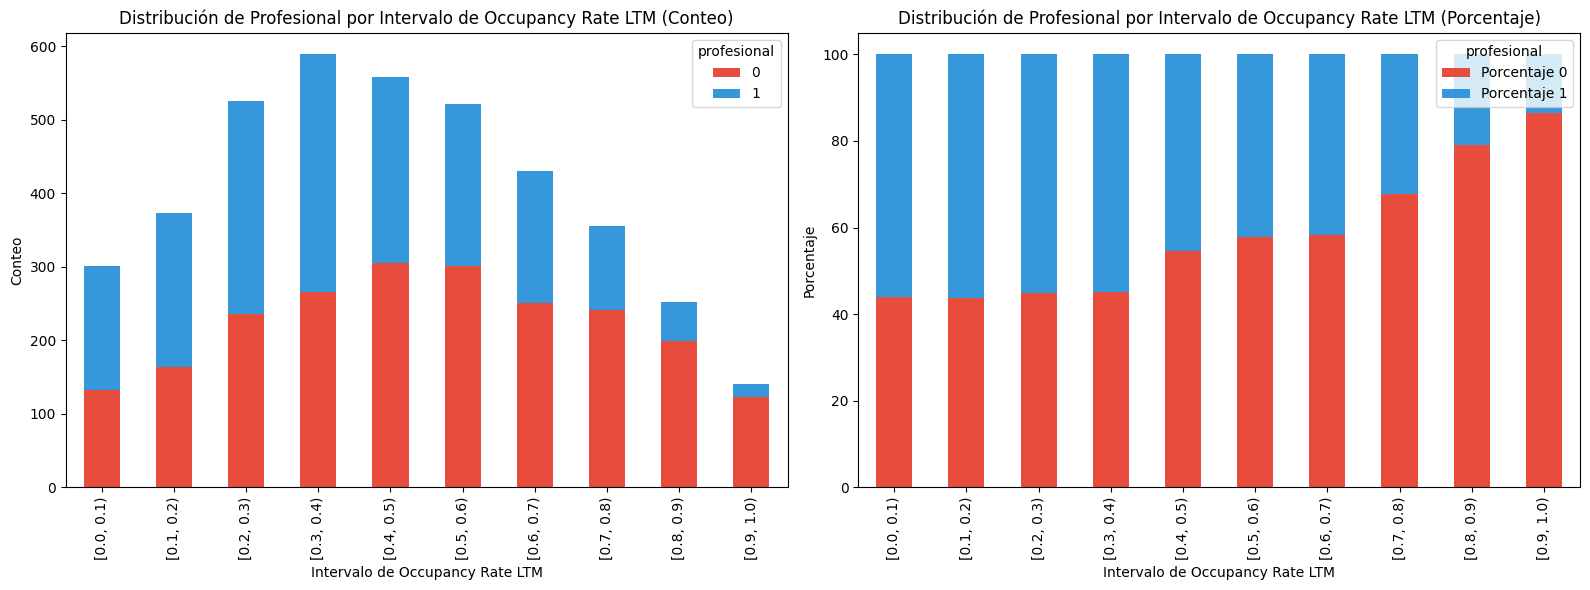

In [10]:
# Supongamos que tienes un DataFrame llamado df con las columnas 'Occupancy Rate LTM' y 'profesional'

# Crear intervalos de 0.1 en 0.1 para 'Occupancy Rate LTM'
df['occupancy_interval'] = pd.cut(df['Occupancy Rate LTM'], bins=[i/10 for i in range(11)], right=False)

# Configura el tamaño de la figura y crea un grid de subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Panel 1: Gráfico de barras apiladas para el conteo de observaciones
agg_df_count = df.groupby(['occupancy_interval', 'profesional']).size().unstack().fillna(0)
agg_df_count.plot(kind='bar', stacked=True, color=["#E74C3C", "#3498DB"], ax=axes[0])
axes[0].set_xlabel('Intervalo de Occupancy Rate LTM')
axes[0].set_ylabel('Conteo')
axes[0].set_title('Distribución de Profesional por Intervalo de Occupancy Rate LTM (Conteo)')

# Panel 2: Gráfico de barras apiladas para los porcentajes
agg_df_percentage = agg_df_count.copy()
agg_df_percentage['Porcentaje 0'] = (agg_df_percentage[0] / (agg_df_percentage[0] + agg_df_percentage[1])) * 100
agg_df_percentage['Porcentaje 1'] = (agg_df_percentage[1] / (agg_df_percentage[0] + agg_df_percentage[1])) * 100
agg_df_percentage[['Porcentaje 0', 'Porcentaje 1']].plot(kind='bar', stacked=True, color=["#E74C3C", "#3498DB"], ax=axes[1])
axes[1].set_xlabel('Intervalo de Occupancy Rate LTM')
axes[1].set_ylabel('Porcentaje')
axes[1].set_title('Distribución de Profesional por Intervalo de Occupancy Rate LTM (Porcentaje)')

# Muestra el gráfico completo para "Occupancy Rate LTM"
plt.tight_layout()
plt.show()


C:\Users\Pedro\AppData\Local\Temp\ipykernel_20452\1309232199.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df_count = df.groupby(['bookings_interval', 'profesional']).size().unstack().fillna(0)


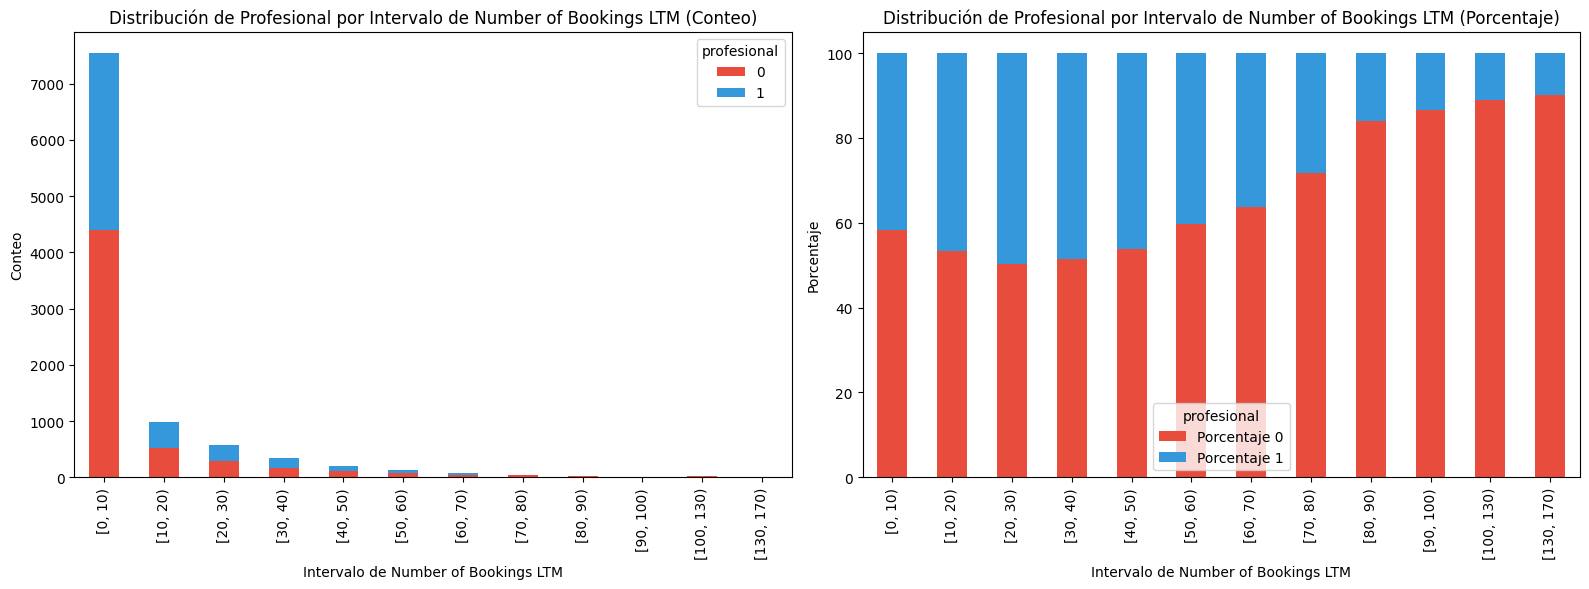

In [11]:
# Supongamos que tienes un DataFrame llamado df con las columnas 'Number of Bookings LTM' y 'profesional'

# Define los cortes de intervalos
intervalos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 130, 170]

# Crear intervalos para 'Number of Bookings LTM'
df['bookings_interval'] = pd.cut(df['Number of Bookings LTM'], bins=intervalos, right=False)

# Configura el tamaño de la figura y crea un grid de subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Crea un DataFrame agregado para contar las ocurrencias de 'profesional' para cada intervalo de 'Number of Bookings LTM'
agg_df_count = df.groupby(['bookings_interval', 'profesional']).size().unstack().fillna(0)

# Crea un gráfico de barras apiladas para el conteo
agg_df_count.plot(kind='bar', stacked=True, color=["#E74C3C", "#3498DB"], ax=axes[0])

# Agrega etiquetas y título al panel de conteo
axes[0].set_xlabel('Intervalo de Number of Bookings LTM')
axes[0].set_ylabel('Conteo')
axes[0].set_title('Distribución de Profesional por Intervalo de Number of Bookings LTM (Conteo)')

# Crea un DataFrame para calcular los porcentajes de 'profesional' para cada intervalo de 'Number of Bookings LTM'
agg_df_percentage = agg_df_count.copy()
agg_df_percentage['Porcentaje 0'] = (agg_df_percentage[0] / (agg_df_percentage[0] + agg_df_percentage[1])) * 100
agg_df_percentage['Porcentaje 1'] = (agg_df_percentage[1] / (agg_df_percentage[0] + agg_df_percentage[1])) * 100

# Crea un gráfico de barras apiladas para los porcentajes
agg_df_percentage[['Porcentaje 0', 'Porcentaje 1']].plot(kind='bar', stacked=True, color=["#E74C3C", "#3498DB"], ax=axes[1])

# Agrega etiquetas y título al panel de porcentajes
axes[1].set_xlabel('Intervalo de Number of Bookings LTM')
axes[1].set_ylabel('Porcentaje')
axes[1].set_title('Distribución de Profesional por Intervalo de Number of Bookings LTM (Porcentaje)')

# Muestra el gráfico completo
plt.tight_layout()
plt.show()


C:\Users\Pedro\AppData\Local\Temp\ipykernel_20452\109126642.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df_count = df.groupby(['reviews_interval', 'profesional']).size().unstack().fillna(0)


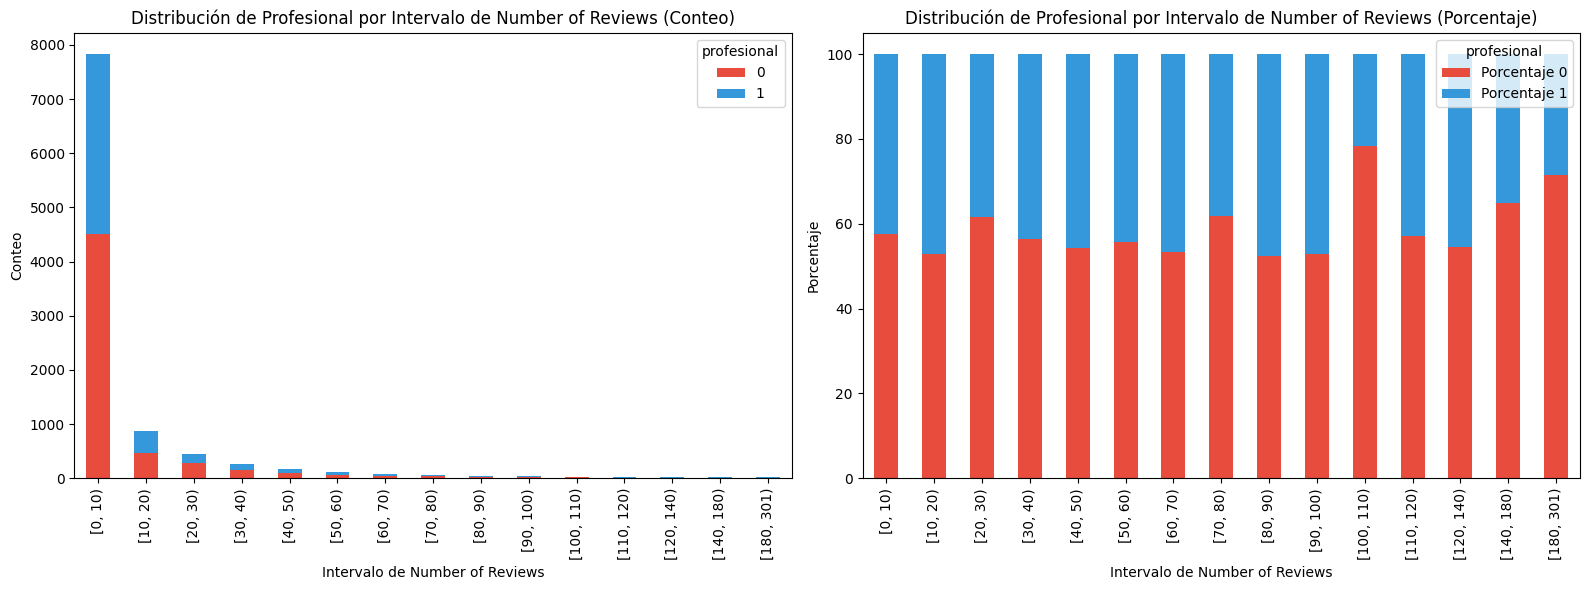

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df con las columnas 'Number of Reviews' y 'profesional'

# Define los cortes de intervalos
intervalos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 140, 180, 301]

# Crear intervalos para 'Number of Reviews'
df['reviews_interval'] = pd.cut(df['Number of Reviews'], bins=intervalos, right=False)

# Configura el tamaño de la figura y crea un grid de subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Panel 1: Gráfico de barras apiladas para el conteo de observaciones
agg_df_count = df.groupby(['reviews_interval', 'profesional']).size().unstack().fillna(0)
agg_df_count.plot(kind='bar', stacked=True, color=["#E74C3C", "#3498DB"], ax=axes[0])
axes[0].set_xlabel('Intervalo de Number of Reviews')
axes[0].set_ylabel('Conteo')
axes[0].set_title('Distribución de Profesional por Intervalo de Number of Reviews (Conteo)')

# Panel 2: Gráfico de barras apiladas para los porcentajes
agg_df_percentage = agg_df_count.copy()
agg_df_percentage['Porcentaje 0'] = (agg_df_percentage[0] / (agg_df_percentage[0] + agg_df_percentage[1])) * 100
agg_df_percentage['Porcentaje 1'] = (agg_df_percentage[1] / (agg_df_percentage[0] + agg_df_percentage[1])) * 100
agg_df_percentage[['Porcentaje 0', 'Porcentaje 1']].plot(kind='bar', stacked=True, color=["#E74C3C", "#3498DB"], ax=axes[1])
axes[1].set_xlabel('Intervalo de Number of Reviews')
axes[1].set_ylabel('Porcentaje')
axes[1].set_title('Distribución de Profesional por Intervalo de Number of Reviews (Porcentaje)')

# Muestra el gráfico completo para "Number of Reviews"
plt.tight_layout()
plt.show()


C:\Users\Pedro\AppData\Local\Temp\ipykernel_20452\819053157.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df_count = df.groupby(['response_interval', 'profesional']).size().unstack().fillna(0)


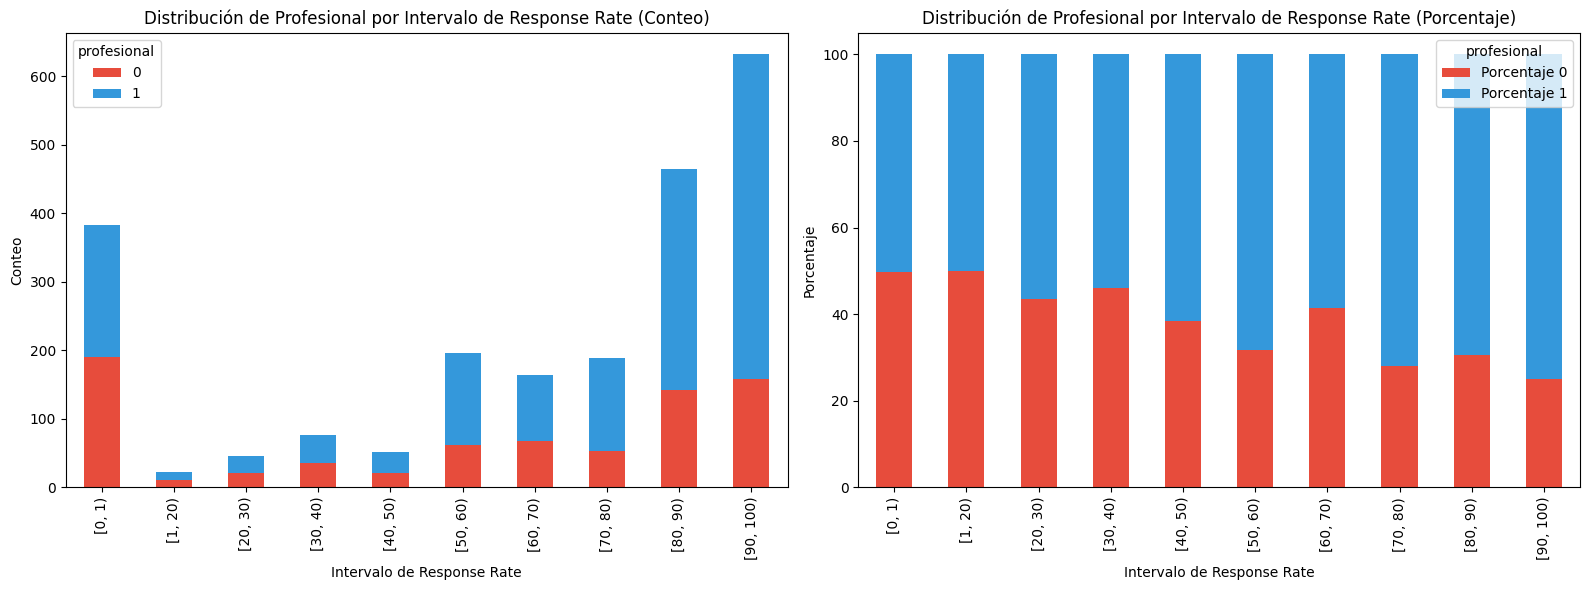

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df con las columnas 'Response Rate' y 'profesional'

# Define los cortes de intervalos
intervalos = [0,1, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Crear intervalos para 'Response Rate'
df['response_interval'] = pd.cut(df['Response Rate'], bins=intervalos, right=False)

# Configura el tamaño de la figura y crea un grid de subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Panel 1: Gráfico de barras apiladas para el conteo de observaciones
agg_df_count = df.groupby(['response_interval', 'profesional']).size().unstack().fillna(0)
agg_df_count.plot(kind='bar', stacked=True, color=["#E74C3C", "#3498DB"], ax=axes[0])
axes[0].set_xlabel('Intervalo de Response Rate')
axes[0].set_ylabel('Conteo')
axes[0].set_title('Distribución de Profesional por Intervalo de Response Rate (Conteo)')

# Panel 2: Gráfico de barras apiladas para los porcentajes
agg_df_percentage = agg_df_count.copy()
agg_df_percentage['Porcentaje 0'] = (agg_df_percentage[0] / (agg_df_percentage[0] + agg_df_percentage[1])) * 100
agg_df_percentage['Porcentaje 1'] = (agg_df_percentage[1] / (agg_df_percentage[0] + agg_df_percentage[1])) * 100
agg_df_percentage[['Porcentaje 0', 'Porcentaje 1']].plot(kind='bar', stacked=True, color=["#E74C3C", "#3498DB"], ax=axes[1])
axes[1].set_xlabel('Intervalo de Response Rate')
axes[1].set_ylabel('Porcentaje')
axes[1].set_title('Distribución de Profesional por Intervalo de Response Rate (Porcentaje)')

# Muestra el gráfico completo para "Response Rate"
plt.tight_layout()
plt.show()


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

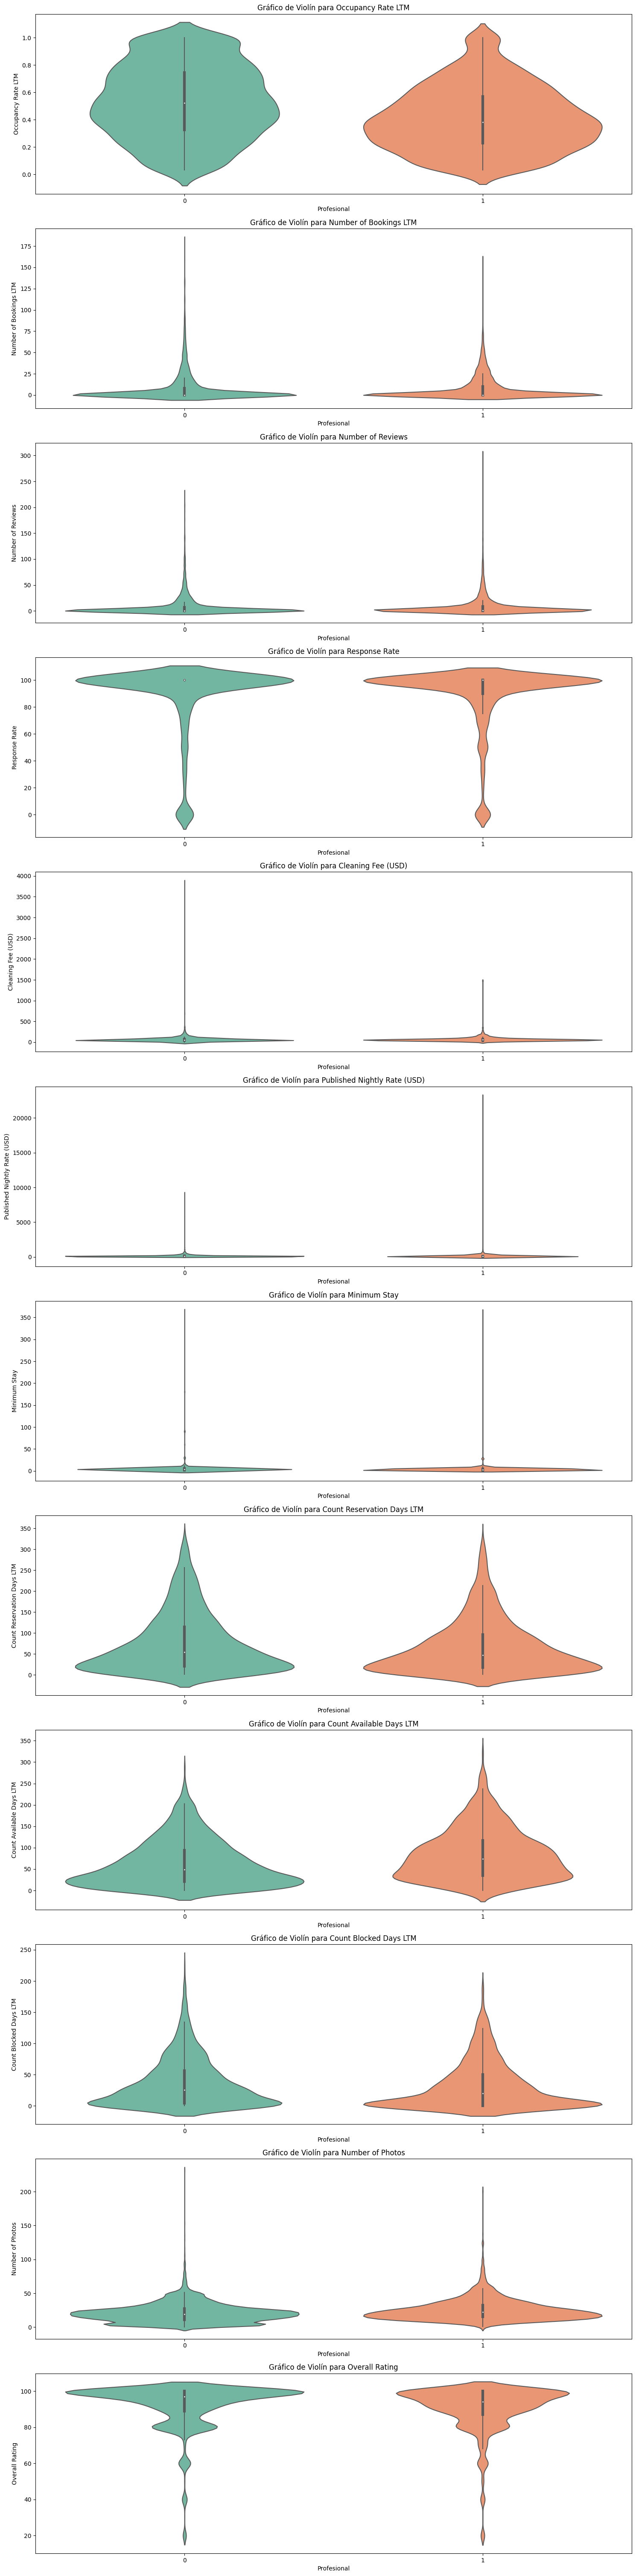

In [14]:
# Obtén una lista de todas las columnas numéricas
columnas = df.select_dtypes(include='number').columns
columnas2=columnas.drop('profesional')
# Configura la disposición de los gráficos
num_filas = len(columnas)
num_columnas = 1

# Ajusta el tamaño de la figura
plt.figure(figsize=(15, num_filas * 5))

# Itera a través de las columnas numéricas y crea un gráfico de violín para cada una
for i, columna in enumerate(columnas2):
    plt.subplot(num_filas, num_columnas, i + 1)

    # Crea el gráfico de violín utilizando Seaborn
    sns.violinplot(x='profesional', y=columna, data=df, palette="Set2")

    # Agrega etiquetas y título
    plt.xlabel('Profesional')
    plt.ylabel(columna)
    plt.title(f'Gráfico de Violín para {columna}')

# Ajusta la disposición de los gráficos
plt.tight_layout()
plt.show()


In [15]:
from scipy.stats import chi2_contingency
pvalues = {}
for columna in columnas_categoricas:
  tabla_contingencia = pd.crosstab(properties[columna], properties['profesional'], dropna=True)
  chi2, p_val, _, _ = chi2_contingency(tabla_contingencia)
  pvalues[columna] = p_val
pvalues_ordenado = dict(sorted(pvalues.items(), key=lambda x: x[1]))
pvalues_ordenado

{'amenities': 0.0,
 'Calendar Last Updated': 6.731264632098516e-157,
 'Cancellation Policy': 1.1356944462923335e-152,
 'Property Type': 2.3701638640599122e-51,
 'Check-in Time': 7.366799986716387e-39,
 'Checkout Time': 1.852937781507772e-31,
 'Airbnb Response Time (Text)': 6.36053156273191e-20,
 'Instantbook Enabled': 7.837586733032978e-14,
 'State': 3.273976756351693e-07,
 'Property Size': 0.00343433739377307,
 'Created Date': 0.015321628260861204,
 'Pets Allowed': 0.01750638741654737,
 'Currency Native': 0.06879046657821795,
 'Airbnb Property Plus': 0.3588768420210581,
 'Airbnb Superhost': 1.0}

In [16]:
from sklearn.preprocessing import LabelEncoder

print(properties.isnull().sum())

properties = properties.dropna(subset=['profesional'])
for columna in columnas_categoricas:
    encoder = LabelEncoder()
    properties[columna] = encoder.fit_transform(properties[columna])
    # Muestra las clases únicas y sus valores numéricos asignados
    print(f"Columna: {columna}")
    print("Clases únicas:", encoder.classes_)
    print("Valores numéricos asignados a las clases únicas:", encoder.transform(encoder.classes_))
    print("-" * 50)

Property Type                      0
Created Date                    3170
State                           1331
City                             328
Currency Native                 3206
Occupancy Rate LTM              5761
Number of Bookings LTM            41
Number of Reviews                  2
Calendar Last Updated           2075
Response Rate                   2689
Airbnb Response Time (Text)     4888
Airbnb Superhost                3190
Cancellation Policy              898
Cleaning Fee (USD)              4855
Published Nightly Rate (USD)     316
Check-in Time                   3637
Checkout Time                   4649
Minimum Stay                     540
Count Reservation Days LTM      5761
Count Available Days LTM        5761
Count Blocked Days LTM          5761
Number of Photos                   2
Instantbook Enabled                0
Overall Rating                  4738
Pets Allowed                    3170
Airbnb Property Plus            6568
Professionality                 3170
p

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Supongamos que tienes un DataFrame 'data' con las columnas 'feature1', 'feature2', y 'target'
# Divide los datos en características (X) y variable de respuesta (y)
X = properties[columnas_categoricas]
y = properties['profesional']

# Divide los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializa el modelo de regresión logística
modelo = LogisticRegression()
# Entrena el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Calcula la precisión del modelo
precision = accuracy_score(y_test, predicciones)
print(f"Precisión del modelo: {precision:.2f}")

# Muestra un informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, predicciones))

Precisión del modelo: 0.74
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.65      0.75      1157
           1       0.64      0.87      0.74       843

    accuracy                           0.74      2000
   macro avg       0.76      0.76      0.74      2000
weighted avg       0.78      0.74      0.74      2000



In [18]:
coeficientes = modelo.coef_[0]

# Crea un DataFrame para visualizar los coeficientes junto con los nombres de las columnas correspondientes
coeficientes_df = pd.DataFrame({'Columna': columnas_categoricas, 'Coeficiente': coeficientes})

# Ordena el DataFrame por el valor absoluto de los coeficientes para ver las características más influyentes
coeficientes_df = coeficientes_df.reindex(coeficientes_df['Coeficiente'].sort_values(ascending=False).index)

# Muestra el DataFrame ordenado
print(coeficientes_df)



                        Columna  Coeficiente
3           Instantbook Enabled     0.438998
6           Cancellation Policy     0.311338
9         Calendar Last Updated     0.270800
1          Airbnb Property Plus     0.252597
5                 Check-in Time     0.114032
0                     amenities     0.028001
8   Airbnb Response Time (Text)     0.026903
11                        State     0.022183
4                 Checkout Time    -0.013949
13                Property Type    -0.021041
12                 Created Date    -0.090169
14                Property Size    -0.108150
2                  Pets Allowed    -0.365619
7              Airbnb Superhost    -0.584886
10              Currency Native    -0.720700
